In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./Depression Student Dataset.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Dietary Habits'] = df['Dietary Habits'].map({'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
df['Sleep Duration'] = df['Sleep Duration'].map({'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4})


# Divide los datos en entrenamiento (train) y el conjunto temporal (temp)
train, temp = train_test_split(df, test_size=0.4, random_state=42)

# Divide el conjunto temporal en validación (validation) y prueba (test)
validation, test = train_test_split(temp, test_size=0.5, random_state=42)
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,28,2.0,4.0,3,1,1,9,2,1,0
1,0,28,4.0,5.0,2,0,1,7,1,1,0
2,0,25,1.0,3.0,2,2,1,10,4,0,1
3,0,23,1.0,4.0,4,2,1,7,2,1,0
4,1,31,1.0,5.0,4,0,1,4,2,1,0


Accuracy: 0.97
Confusion Matrix:
 [[43  2]
 [ 1 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.96      0.98      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



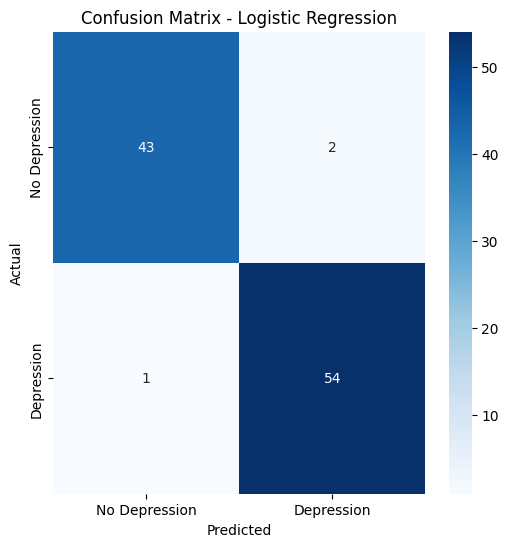

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecting features (excluding the target column 'Depression')
X = df.drop(columns=['Depression'])

# Target variable
y = df['Depression']

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(train.drop(columns=['Depression']), train['Depression'])

# Predicting on the validation set
y_pred = model.predict(validation.drop(columns=['Depression']))

# Evaluate the model
accuracy = accuracy_score(validation['Depression'], y_pred)
conf_matrix = confusion_matrix(validation['Depression'], y_pred)
class_report = classification_report(validation['Depression'], y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(train.drop(columns=['Depression']), train['Depression'])

# Predictions on validation set
y_pred_rf = rf_model.predict(validation.drop(columns=['Depression']))

# Evaluate Random Forest
accuracy_rf = accuracy_score(validation['Depression'], y_pred_rf)
conf_matrix_rf = confusion_matrix(validation['Depression'], y_pred_rf)
class_report_rf = classification_report(validation['Depression'], y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.91
Random Forest Confusion Matrix:
 [[41  4]
 [ 5 50]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.93      0.91      0.92        55

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



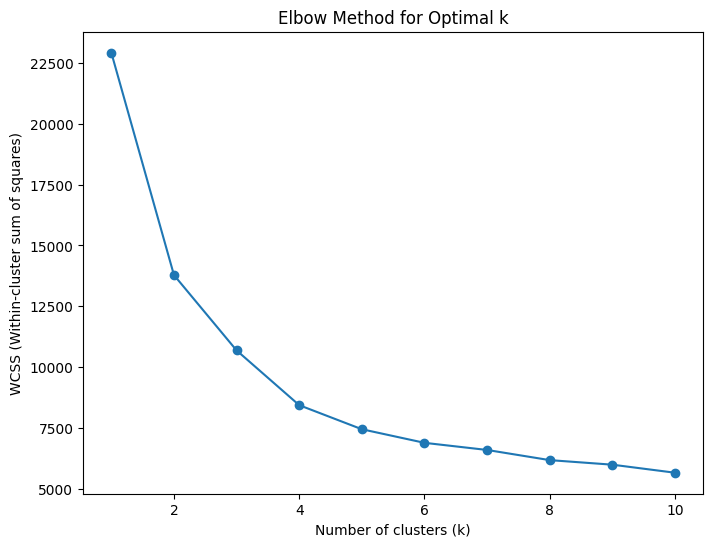

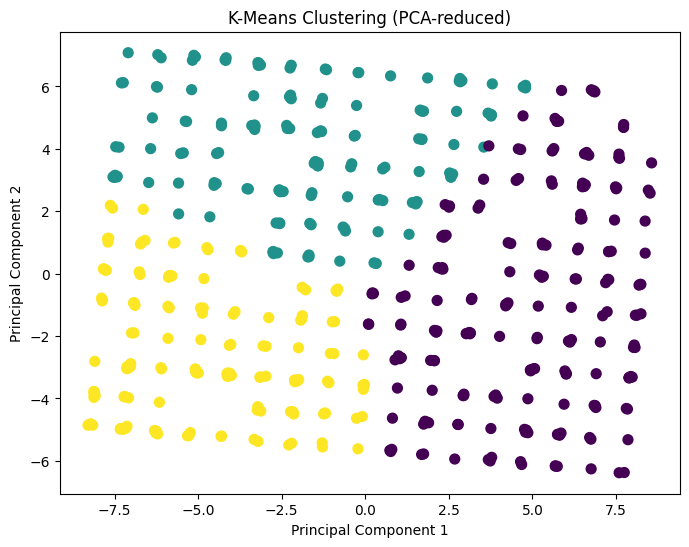

Silhouette Score for K-Means: 0.29608942309739456


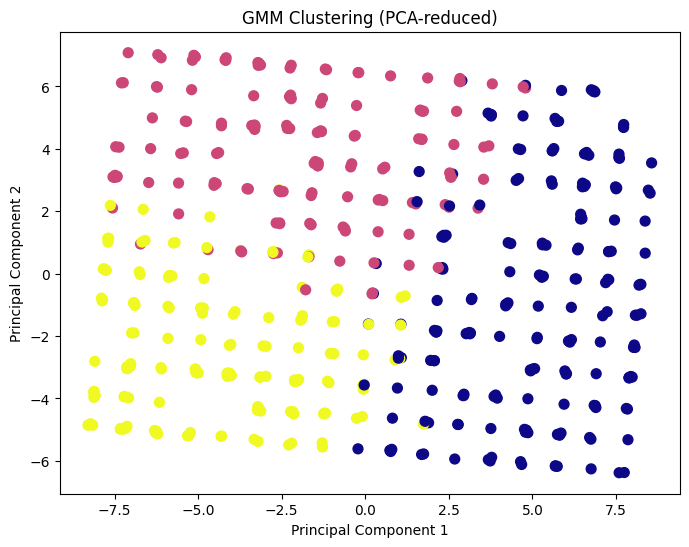

Silhouette Score for GMM: 0.2785847296871022
Average Depression Rate by Cluster:
 Cluster
0    0.628713
1    0.364865
2    0.467105
Name: Depression, dtype: float64


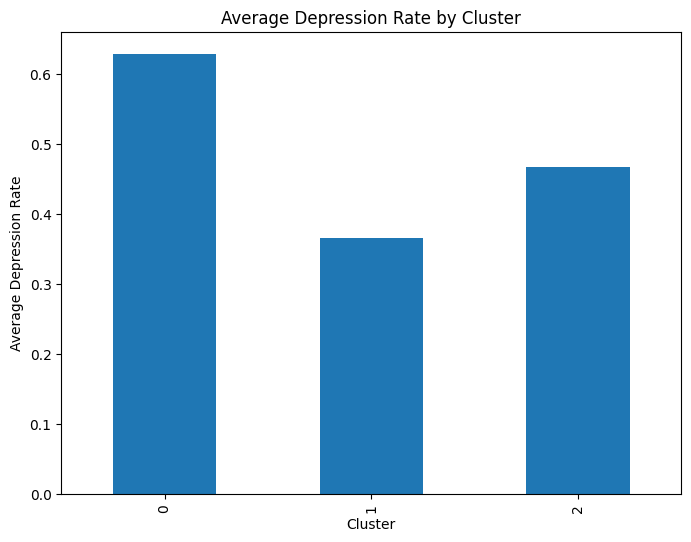

In [11]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# K-Means Clustering
numeric_features = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 
                    'Dietary Habits', 'Study Hours', 'Financial Stress']
# Elbow method to determine optimal k
wcss = []  # Within-cluster sum of squares
range_k = range(1, 11)  # Test for k = 1 to k = 10

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_features])
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range_k, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# Perform K-Means clustering with k=3 (based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_features])

# PCA for visualization (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_features])

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Silhouette Score for K-Means
sil_score_kmeans = silhouette_score(df[numeric_features], df['Cluster'])
print("Silhouette Score for K-Means:", sil_score_kmeans)

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(df[numeric_features])

# PCA for GMM visualization (2D)
gmm_result = pca.transform(df[numeric_features])

plt.figure(figsize=(8, 6))
plt.scatter(gmm_result[:, 0], gmm_result[:, 1], c=df['Cluster_GMM'], cmap='plasma', s=50)
plt.title('GMM Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Silhouette Score for GMM
sil_score_gmm = silhouette_score(df[numeric_features], df['Cluster_GMM'])
print("Silhouette Score for GMM:", sil_score_gmm)

# Average depression rate per cluster
cluster_depression = df.groupby('Cluster')['Depression'].mean()
print("Average Depression Rate by Cluster:\n", cluster_depression)

# Bar chart of depression rate by cluster
cluster_depression.plot(kind='bar', figsize=(8, 6))
plt.title('Average Depression Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Depression Rate')
plt.show()


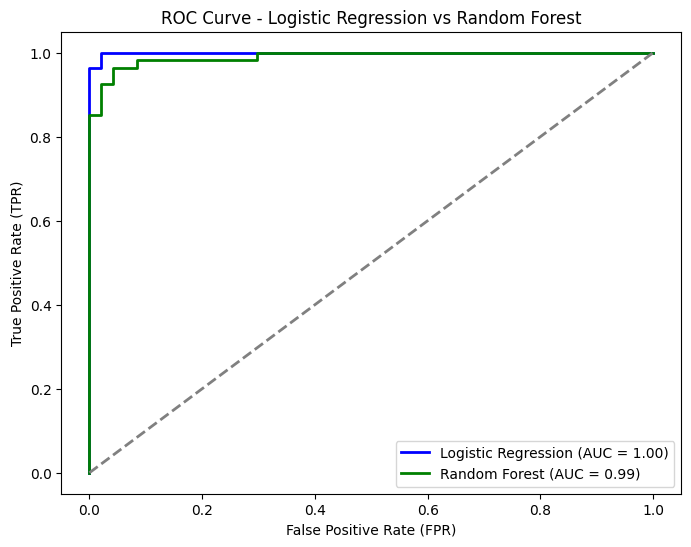

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score



# Define features (X) and target (y)
X_train = train.drop(columns=['Depression'])
y_train = train['Depression']
X_validation = validation.drop(columns=['Depression'])
y_validation = validation['Depression']
X_test = test.drop(columns=['Depression'])
y_test = test['Depression']

# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Logistic Regression and Random Forest
plt.figure(figsize=(8, 6))

# Plot for Logistic Regression
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))

# Plot for Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Plot the diagonal line (No Skill line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Labels and Title
plt.title('ROC Curve - Logistic Regression vs Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

